Importamos librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Leemos el dataset

In [ ]:
dataset_train = pd.read_csv('TWTR (2).csv')
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,36.230000,36.740002,35.540100,36.560001,36.560001,12062461
1,2015-01-05,36.259998,37.110001,35.639999,36.380001,36.380001,15062744
2,2015-01-06,36.270000,39.450001,36.040001,38.759998,38.759998,33050812
3,2015-01-07,39.099998,39.099998,37.060001,37.279999,37.279999,22675663
4,2015-01-08,37.419998,39.189999,37.090000,39.090000,39.090000,19190436


Tamaño del dataset

In [ ]:
dataset_train.shape

(1762, 7)

Datos de apertura se pasan a vector fila con Pandas

In [ ]:
training_set = dataset_train.loc[:,'Open']
print(training_set.shape)
type(training_set)

(1762,)


pandas.core.series.Series

Datos de apertura se pasan de vector fila a vector columna usando Numpy

In [ ]:
training_set = dataset_train.loc[:,['Open']].values
print(training_set.shape)
print(type(training_set))

(1762, 1)
<class 'numpy.ndarray'>


Escalamos los datos usando la normalización entre (0,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[:5]

array([[0.34590901],
       [0.34637475],
       [0.34653004],
       [0.39046728],
       [0.36438438]])

Creamos una estrutura de datos entre 60 dias

In [ ]:
X_train = []
y_train = []

for i in range(60, training_set_scaled.size):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

Tamaño de X e Y

In [ ]:
X_train.shape

(1702, 60)

In [ ]:
y_train.shape

(1702,)

Usamos reshape para agregar profundidad a la matriz

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1702, 60, 1)

Importamos keras para crear una RN recurrente

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

Creamos la RN

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [ ]:
regressor.add(Dense(units=1))

Compilamos los datos de la RN para conectar sus capas

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Creamos y aplicamos el entrenamiento

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
54/54 [==============================] - 12s 93ms/step - loss: 0.0188
Epoch 2/100
54/54 [==============================] - 5s 96ms/step - loss: 0.0059
Epoch 3/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0050
Epoch 4/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0049
Epoch 5/100
54/54 [==============================] - 5s 93ms/step - loss: 0.0047
Epoch 6/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0042
Epoch 7/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0038
Epoch 8/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0035
Epoch 9/100
54/54 [==============================] - 5s 96ms/step - loss: 0.0033
Epoch 10/100
54/54 [==============================] - 5s 95ms/step - loss: 0.0032
Epoch 11/100
54/54 [==============================] - 5s 98ms/step - loss: 0.0031
Epoch 12/100
54/54 [==============================] - 6s 104ms/step - loss: 0.0030
Epoch 13/100
54/54 [===

Cargamos y preparamos el dataset de los precios reales del mes de Enero 2022

In [ ]:
dataset_test = pd.read_csv('TWTR - TWTR (1).csv') 
real_stock_price = dataset_test.loc[:, ['Open']].values

In [ ]:
real_stock_price

array([[43.5     ],
       [42.849998],
       [40.799999],
       [39.5     ],
       [39.650002],
       [39.320003],
       [39.330002],
       [39.790001],
       [40.880001],
       [40.150002],
       [38.43    ],
       [37.720001],
       [37.130001],
       [37.84    ],
       [36.900002],
       [33.700001],
       [34.220001],
       [34.970001],
       [34.139999],
       [33.790001]])

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], 
                           dataset_test['Open']), 
                           axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Hacemos la predicción


In [ ]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


Graficamos y comparamos la predicción

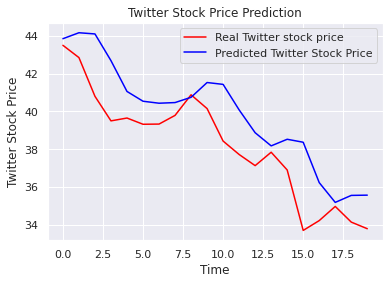

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Twitter stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Twitter Stock Price')
plt.title('Twitter Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Twitter Stock Price')
plt.legend()
plt.show()